학습용 데이터 확인 및 준비

In [4]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
print(diabetes.data.shape,diabetes.target.shape)

(442, 10) (442,)


In [5]:
import sklearn

In [6]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [7]:
diabetes.target[:3]

array([151.,  75., 141.])

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


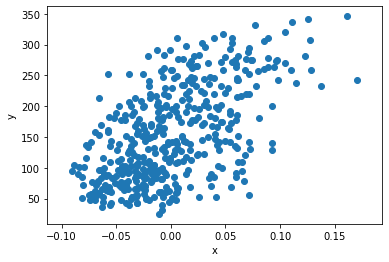

In [12]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2],diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
x=diabetes.data[:,2]
y=diabetes.target

학습 알고리즘 설계

In [13]:
w=1.0
b=1.0
y_hat=x[0]*w+b
print(y_hat)


1.0616962065186886


w 와 b의 초기값이 1로 고정이 아닌 랜덤으로 접근을 하기 위해서는 아래와 같은 코드를 통해서 랜덤으로 접근할 수 있게 할 수 있다.

from random import *
w=randint(1,100)  --> 1과 100사이의 임의의 정수
print(w)
b=randint()       --> 0과 1 사이의 임의의 소수
print(b)

In [10]:
from random import *
pil=randint(1,100)
wook=randint(1,100)
print(pil)
print(wook)

72
92


In [11]:
w=pil
b=wook

In [14]:
w_inc=w-0.1
y_hat_inc=x[0]*w_inc+b
print(y_hat_inc)

1.0555265858668197


In [15]:
w_rate=(y_hat_inc-y_hat)/(w_inc-w)
print(w_rate)

0.061696206518688804


In [16]:
w_new=w+w_rate
print(w_new)

1.0616962065186888


In [17]:
b_inc=b+0.1
y_hat_inc=x[0]*w+b_inc
print(y_hat_inc)

b_rate=(y_hat_inc-y_hat)/(b_inc-b)
print(b_rate)

1.1616962065186887
1.0


In [18]:
b_new=b+1
print(b_new)

2.0


In [19]:
err=y[0]-y_hat
w_new=w+w_rate*err
b_new=b+1*err
print(w_new,b_new)

10.250624555904524 150.9383037934813


In [20]:
y_hat=x[1]*w_new+b_new
err=y[1]-y_hat
w_rate=x[1]
w_new=w_new+w_rate*err
b_new=b_new+1*err
print(w_new,b_new)

14.132317616381778 75.52764127612664


In [21]:
for x_i,y_i in zip(x,y):
    y_hat=x_i*w+b
    err=y_i-y_hat
    w_rate=x_i
    w=w+w_rate*err
    b=b+1*err
print(w,b)

587.8654539985689 99.40935564531424


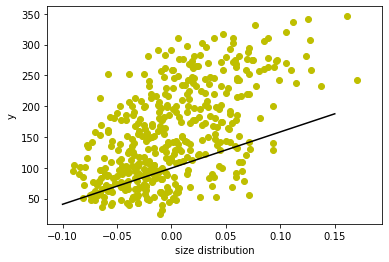

In [27]:
plt.scatter(x,y,c='y')
pt1=(-0.1,-0.1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],color='black')
plt.xlabel('size distribution')
plt.ylabel('y')
plt.show()

In [17]:
for i in range(1,100):
    for x_i,y_i in zip(x,y):
        y_hat=x_i*w+b
        err=y_i-y_hat
        w_rate=x_i
        w=w+w_rate*err
        b=b+1*err
print(w,b)

913.5973364345905 123.39414383177204


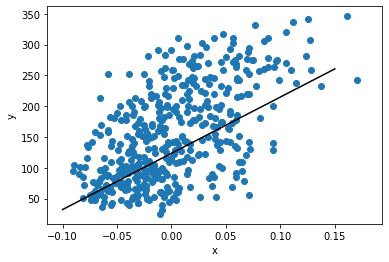

In [18]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

설계된 모델을 통해서 실제 사용하기

In [19]:
x_new=0.18
y_pred=x_new*w+b
print(y_pred)

287.8416643899983


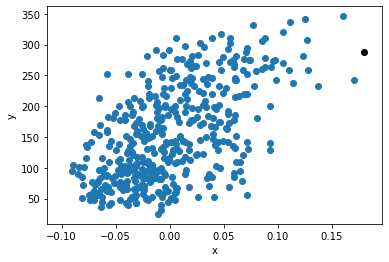

In [20]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred,c='black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [21]:
y_hat=x_i*w+b
err=y_i-y_hat
w_rate=x_i
w=w+w_rate*err

# err=y_i-y_hat
# b=b+1*err

In [9]:
class Neuron:
    def __init__(self):
        self.w=1.0
        self.b=1.0
        
    def forpass(self,x):
        y_hat=x*self.w+self.b
        
        return y_hat
    
    def backprop(self,x,err):
        w_grad=x*err
        b_grad=1*err
        
        return w_grad,b_grad
    
    def fit(self,x,y,epochs):
        for i in range(epochs):
            for x_i,y_i in zip(x,y):
                y_hat=self.forpass(x_i)
                err=-(y_i-y_hat)
                w_grad,b_grad=self.backprop(x_i,err)
                self.w-=w_grad
                self.b-=b_grad

In [10]:
n=Neuron()
n.fit(x,y,100)

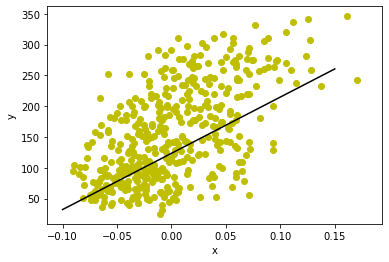

In [13]:
plt.scatter(x,y,c='y')
pt1=(-0.1,-0.1*n.w+n.b)
pt2=(0.15,0.15*n.w+n.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()